In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
#load data
xls = pd.ExcelFile('LearnerOntology_InitialDataLoad.xlsx')
df1 = pd.read_excel(xls, 'learner_static')
df2 = pd.read_excel(xls, 'learning_style')
learner_data=pd.merge(df1,df2,how='inner',on='SID')
learner_data['Active_Reflective']=''
learner_data['Sensitive_Intutive']=''
learner_data['Visual_Verbal']=''
learner_data['Global_Sequential']=''
columns=list(learner_data.columns) 
columns
#check wether value is dominant
def isDominant(score):
    score_min=score-50
    if score_min>0:
        return True
    else:
        return False

def activeOrReflective(score):
    if isDominant(score):
        return '1'
    else:
        return '0'
    
def sensitiveOrIntutive(score):
    if isDominant(score):
        return '1'
    else:
        return '0'
def visualOrVerbal(score):
    if isDominant(score):
        return '1'
    else:
        return '0'
def Global_Sequential(score):
    if isDominant(score):
        return '1'
    else:
        return '0'
    
learner_data['Active_Reflective'] = learner_data.apply(lambda x: activeOrReflective(x.Active), axis=1)
learner_data['Sensitive_Intutive'] =learner_data.apply(lambda x: sensitiveOrIntutive(x.Sensitive), axis=1)
learner_data['Visual_Verbal'] =learner_data.apply(lambda x: visualOrVerbal(x.Visual), axis=1)
learner_data['Global_Sequential'] =learner_data.apply(lambda x: Global_Sequential(x.Global), axis=1)
Background=list(learner_data['Background Knowledge'].unique())
Qualification=list(learner_data['Qualification'].unique())

def findBK(bk):
    return Background.index(bk)
def findQual(qual):
    return Qualification.index(qual)
learner_data['Background Knowledge'] =learner_data.apply(lambda x: findBK(x['Background Knowledge']), axis=1)
learner_data['Qualification'] =learner_data.apply(lambda x: findQual(x['Qualification']), axis=1)

learner_data

FileNotFoundError: [Errno 2] No such file or directory: 'LearnerOntology_InitialDataLoad.xlsx'

In [ ]:
x = learner_data.iloc[:, [4,6,7,8,9,10,11,12,13,14]].values
x [0][0]

In [ ]:
kmeans5 = KMeans(n_clusters=16)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)



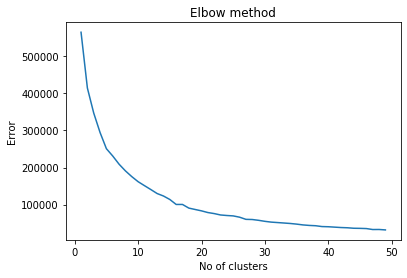

In [5]:
Error =[]
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 50), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [70]:
kmeans5 = KMeans(n_clusters=11)
y_kmeans5 = kmeans5.fit_predict(x)
learner_data['clusters']=y_kmeans5
learner_data
x1 = learner_data.iloc[:, [0,4,6,7,8,9,10,11,12,13,14,15]].values
x1[:,11]
x1[:,1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [68]:
x[0]


array([0, 0, 70, 40, 60, 51, '1', '0', '1', '1'], dtype=object)

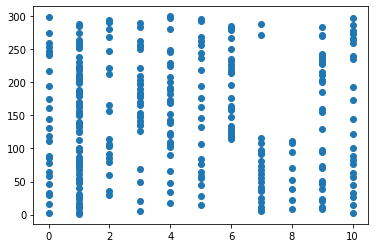

In [71]:
plt.scatter(x1[:,11],x1[:,0], label='True Position')
